In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Load the CSV into a DataFrame
file_path = "/home/betty/Desktop/cURRENTLY_WORKING/csv-data/result.csv" 
df = pd.read_csv(file_path)

categories = [
    'most_expensive_belgium', 'least_expensive_belgium',
    'most_expensive_flanders', 'least_expensive_flanders',
    'most_expensive_walloons', 'least_expensive_walloons',
    'most_expensive_brussels', 'least_expensive_brussels'
]

# Add the Category column
df['Category'] = categories
print(df.columns) 

columns = ['Category'] + [col for col in df.columns if col != 'Category']
df = df[columns]
df = df.drop(columns=['Unnamed: 0'])

# Split the 'average_price' column into two parts: string and number
df[['locality', 'average_price']] = df['average_price'].str.extract(r"\((.*),\s*([\d\.]+)\)")
df['average_price'] = pd.to_numeric(df['average_price'])
df[['locality', 'median_price']] = df['median_price'].str.extract(r"\((.*),\s*([\d\.]+)\)")
df['median_price'] = pd.to_numeric(df['median_price'])
df[['Province', 'price_m2']] = df['price_m2'].str.extract(r"\((.*),\s*([\d\.]+)\)")
df['price_m2'] = pd.to_numeric(df['price_m2'])
print(df.dtypes)


df = df[['Category', 'locality', 'average_price', 'median_price', 'price_m2', 'Province']]
print(df.columns)
print(df.head())

Index(['Unnamed: 0', 'average_price', 'median_price', 'price_m2', 'Category'], dtype='object')
Category          object
average_price    float64
median_price     float64
price_m2         float64
locality          object
Province          object
dtype: object
Index(['Category', 'locality', 'average_price', 'median_price', 'price_m2',
       'Province'],
      dtype='object')
                   Category                 locality  average_price  \
0    most_expensive_belgium  'S-gravenwezel-schilde'      1675000.0   
1   least_expensive_belgium       'Bouillon-ucimont'        59900.0   
2   most_expensive_flanders  'S-gravenwezel-schilde'      1675000.0   
3  least_expensive_flanders       'Schuiferskapelle'       135000.0   
4   most_expensive_walloons            'Lasne-ohain'      1480000.0   

   median_price  price_m2                       Province  
0     1675000.0  21112.39            'Province of Namur'  
1       59900.0   1110.07          'Province of Hainaut'  
2     1675000.0  16

/tmp/ipykernel_11503/3739429568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Province', y='price_m2', palette='coolwarm')


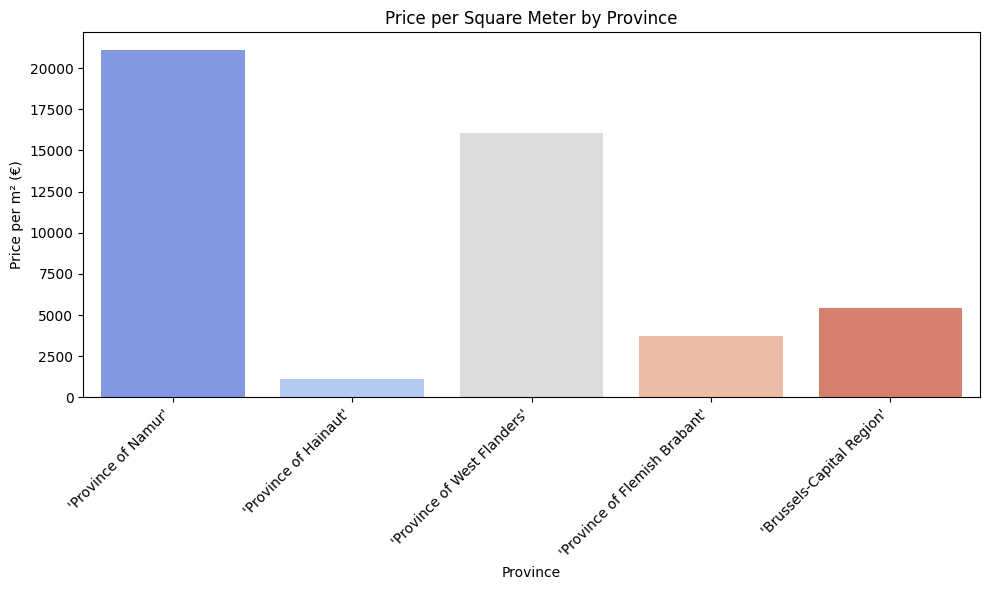

In [4]:
# Bar chart for prices per square meter by province
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Province', y='price_m2', palette='coolwarm')
plt.title('Price per Square Meter by Province')
plt.ylabel('Price per m² (€)')
plt.xlabel('Province')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [5]:
# Create a dictionary with localities and their coordinates
coordinates = {
    'S-gravenwezel-schilde': (51.2629, 4.5610),
    'Bouillon-ucimont': (49.7946, 5.0706),
    'Schuiferskapelle': (51.0329, 3.3338),
    'Lasne-ohain': (50.6991, 4.4692),
    'Ixelles-chatelain': (50.8255, 4.3598),
    'Molenbeek': (50.8589, 4.3121)
}

# Extract latitude and longitude coordinates
df['latitude'] = df['locality'].str.strip("'").map(lambda loc: coordinates.get(loc, (None, None))[0])
df['longitude'] = df['locality'].str.strip("'").map(lambda loc: coordinates.get(loc, (None, None))[1])
print(df.head(10))

                   Category                 locality  average_price  \
0    most_expensive_belgium  'S-gravenwezel-schilde'      1675000.0   
1   least_expensive_belgium       'Bouillon-ucimont'        59900.0   
2   most_expensive_flanders  'S-gravenwezel-schilde'      1675000.0   
3  least_expensive_flanders       'Schuiferskapelle'       135000.0   
4   most_expensive_walloons            'Lasne-ohain'      1480000.0   
5  least_expensive_walloons       'Bouillon-ucimont'        59900.0   
6   most_expensive_brussels      'Ixelles-chatelain'      1350000.0   
7  least_expensive_brussels              'Molenbeek'       192000.0   

   median_price  price_m2                       Province  latitude  longitude  
0     1675000.0  21112.39            'Province of Namur'   51.2629     4.5610  
1       59900.0   1110.07          'Province of Hainaut'   49.7946     5.0706  
2     1675000.0  16048.67    'Province of West Flanders'   51.2629     4.5610  
3      135000.0   3720.47  'Province of 

In [6]:
# Filter the DataFrame to exclude the categories 'most_expensive_belgium' and 'least_expensive_belgium'
df_filtered = df[~df['Category'].isin(['most_expensive_belgium', 'least_expensive_belgium'])]

# Create an interactive map with the filtered categories
fig = px.scatter_mapbox(
    df_filtered,
    lat='latitude',  
    lon='longitude',  
    text='locality',  
    size='average_price',  
    color='Category',  
    hover_name='locality', 
    hover_data={'average_price': True, 'price_m2': True, 'median_price': True},
    mapbox_style="carto-positron",  # Map style
    title="Interactive Map of Average Prices by Locality",
)

# Set a fixed size for the bubbles
fig.update_traces(marker=dict(size=50))  # Fixed size for the bubbles

# Display the map
fig.update_layout(height=800, margin={"r":0,"t":40,"l":0,"b":0})
fig.show()